In [159]:
import pandas as pd
import numpy as np
import math
from random import random

import imageio
import os

import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
def PointsInCircum(r,n=100):
    return np.array([(math.cos(2*np.pi/n*x)*r,math.sin(2*np.pi/n*x)*r) for x in range(0,n+1)])

def PointsInCircum2(r,n=100):
    points=[]
    for x in range(n):
        points.append((math.cos(2*np.pi/n*x)*(r+random()*(r/2)),math.sin(2*np.pi/n*x)*(r+random()*(r/2))))
    return np.array(points)

def rand_cluster(n,c,r):
    """returns n random points in disk of radius r centered at c"""
    x,y = c
    points = []
    for i in range(n):
        theta = 2*math.pi*random()
        s = r*random()
        points.append((x+s*math.cos(theta), 6*y+s*math.sin(theta)))
    return np.array(points)

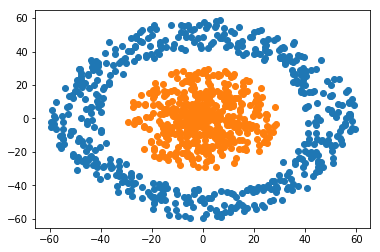

In [145]:
def generate_data(n_samples):
#     n_samples = 1000
    X1 = PointsInCircum2(40,int(n_samples/2))
    X2 = rand_cluster(int(n_samples/2),(0,0),30)
    plt.scatter(*X1.T)
    plt.scatter(*X2.T)

    X = np.vstack([X1, X2])
    y0 = np.zeros(shape=(int(n_samples/2), 1))
    y1 = np.ones(shape=(int(n_samples/2), 1))
    yhat = np.vstack([y0, y1])
    return X, yhat

X, yhat = generate_data(1000)

In [101]:
def sig(z):
    return 1 / (1 + np.exp(-z))

def dsig_dz(z):
    return sig(z) * (1 - sig(z))

def J(y, yhat):
    eps = 1e-8
    return -(yhat*np.log(y+eps) + (1-yhat)*np.log(1-y+eps))

def dJ_dy(y, yhat):
    eps = 1e-8
    return (1-yhat)/(1-y+eps) - yhat/(y+eps)

def relu(z):
    return np.where(z>0, z, 0)
    
def drelu_dz(z):
    return np.where(z>0, 1, 0)

In [102]:
# 3 layers in network, nr of nodes in network:
n_input = 2
n_hidden = 10
n_out = 1

In [103]:
#initialize weights for input and hidden layers:
# size +1 for bias
w_0 = np.random.normal(0,0.1, size = (n_input+1,n_hidden)) #input layer
w_1 = np.random.normal(0,0.1, size = (n_hidden+1, n_out)) #hidden layer

w1 = np.random.normal(0,0.1, size=(n_input, n_hidden))
w2 = np.random.normal(0,0.1, size=(n_hidden, n_out))

b1 = np.random.normal(0,0.1, size=(n_hidden, 1))
b2 = np.random.normal(0,0.1, size=(n_out, 1))

In [104]:
def backwardJ(x0, w1, b1, w2, b2, y, yhat, alpha):
    # quantities
    z1 = np.dot(x0, w1) + b1.T
    x1 = relu(z1)
    z2 = np.dot(x1, w2) + b2.T
    #y = sig(z2)

    delta2 = dJ_dy(y, yhat) * dsig_dz(z2)
    delta1 = np.matmul(w2, delta2) * drelu_dz(z1).T

    w2 -= alpha * np.multiply(delta2, x1).T
    w1 -= alpha * np.multiply(delta1, x0).T

    b2 -= alpha * delta2
    b1 -= alpha * delta1
    
    return w1, b1, w2, b2

def prediction(x0, w1, b1, w2, b2):
    x1 = relu(np.dot(x0, w1) + b1.T)  # output of hidden layer
    return sig(np.dot(x1, w2) + b2.T)  # output of output layer

In [105]:
alpha=0.1

y = prediction(X[0], w1,b1,w2,b2)
w1, b1, w2, b2 = backwardJ(X[0], w1, b1, w2, b2, y, yhat[0], alpha)
print(y)
print(J(y, yhat[0]))

[[ 0.31407841]]
[[ 0.37699195]]


In [106]:
def train_network(X, labels, step, nr_epochs,n_hidden): #implementation of pseudocode
    #initialize weights
    n_samples = X.shape[0]
    n_input = X.shape[1]
    n_output = 1
    costs = np.zeros(shape=(n_epoch,1))
#    X = input data
    w1 = np.random.normal(0,0.1, size=(n_input, n_hidden))
    w2 = np.random.normal(0,0.1, size=(n_hidden, n_out))

    b1 = np.random.normal(0,0.1, size=(n_hidden, 1))
    b2 = np.random.normal(0,0.1, size=(n_out, 1))
    
    for epoch in range(nr_epochs):
        for i, row in enumerate(X):
            y_pred = prediction(row,w1,b1,w2,b2)
            w1,b1,w2,b2 = backwardJ(row, w1, b1, w2, b2, y_pred, labels[i], step)
            
        howyoudoin = prediction(X, w1, b1, w2, b2)
        costs[epoch] = np.mean(J(howyoudoin, labels))
        
        if ((epoch % 10) == 0) or (epoch == (n_epoch - 1)):
            #print(predictions.round())
            accuracy = np.mean(howyoudoin.round() == yhat)  # current accuracy on entire set
            print('Training accuracy after epoch {}: {:.4%}'.format(epoch, accuracy))
            
    return w1, b1, w2, b2, costs


In [110]:
n_epoch = int(200)
n_hidden = 3
step = 0.001
w1, b1, w2, b2, costs = train_network(X, yhat ,step, n_epoch, n_hidden)

Training accuracy after epoch 0: 62.5000%
Training accuracy after epoch 10: 50.4000%
Training accuracy after epoch 20: 52.6000%
Training accuracy after epoch 30: 59.7000%
Training accuracy after epoch 40: 66.3000%
Training accuracy after epoch 50: 70.8000%
Training accuracy after epoch 60: 73.4000%
Training accuracy after epoch 70: 77.3000%
Training accuracy after epoch 80: 79.0000%
Training accuracy after epoch 90: 81.8000%
Training accuracy after epoch 100: 81.9000%
Training accuracy after epoch 110: 82.2000%
Training accuracy after epoch 120: 82.4000%
Training accuracy after epoch 130: 82.7000%
Training accuracy after epoch 140: 83.1000%
Training accuracy after epoch 150: 83.4000%
Training accuracy after epoch 160: 83.4000%
Training accuracy after epoch 170: 83.9000%
Training accuracy after epoch 180: 84.2000%
Training accuracy after epoch 190: 83.9000%
Training accuracy after epoch 199: 85.5000%


In [115]:
x1 = np.linspace(-60,60, 250)
x2 = np.linspace(-60,60, 250)
fun_map = np.empty((x1.size, x2.size))
for n,i in enumerate(x1):
    for m,j in enumerate(x2):
        fun_map[m,n] = prediction([i,j], w1, b1, w2, b2)

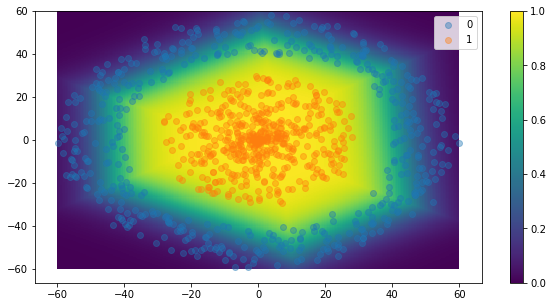

In [116]:
X0 = X[(yhat==0).reshape(-1)]
X1 = X[(yhat==1).reshape(-1)]

plt.figure(figsize=(10,5))
plt.imshow(fun_map, extent=[x1.min(), x1.max(), x2.min(), x2.max()], 
           vmin=0, vmax=1, aspect='auto')
plt.colorbar()
plt.scatter(*X0.T, label='0', alpha=0.4); plt.scatter(*X1.T, label='1', alpha=0.4)
plt.legend()

In [165]:
def train_network_wplots(X, labels, step, nr_epochs, n_hidden, RUN_LABEL): #implementation of pseudocode
    #initialize weights
    x1 = np.linspace(-65,65, 250)
    x2 = np.linspace(-65,65, 250)
    s=1
#     plt.figure(figsize=(20,30))
    
    n_samples = X.shape[0]
    n_input = X.shape[1]
    n_output = 1
    costs = np.zeros(shape=(n_epoch,1))
#    X = input data
    w1 = np.random.normal(0,0.1, size=(n_input, n_hidden))
    w2 = np.random.normal(0,0.1, size=(n_hidden, n_out))

    b1 = np.random.normal(0,0.1, size=(n_hidden, 1))
    b2 = np.random.normal(0,0.1, size=(n_out, 1))
    
    for epoch in range(nr_epochs):
        for i, row in enumerate(X):
            y_pred = prediction(row,w1,b1,w2,b2)
            w1,b1,w2,b2 = backwardJ(row, w1, b1, w2, b2, y, labels[i], step)
            
        howyoudoin = prediction(X, w1, b1, w2, b2)
        costs[epoch] = np.mean(J(howyoudoin, labels))
        
        if ((epoch % 5) == 0) or (epoch == (n_epoch - 1)):
            accuracy = np.mean(howyoudoin.round() == yhat)  # current accuracy on entire set
            print('Training accuracy after epoch {}: {:.4%}'.format(epoch, accuracy))
            fun_map = np.empty((x1.size, x2.size))
            for n,i in enumerate(x1):
                for m,j in enumerate(x2):
                    fun_map[m,n] = prediction([i,j], w1, b1, w2, b2)

            X0 = X[(yhat==0).reshape(-1)]
            X1 = X[(yhat==1).reshape(-1)]

#             plt.subplot(int(np.round(nr_epochs/10/2))+2,2,s)
            s+=1
            plt.imshow(fun_map, extent=[x1.min(), x1.max(), x2.min(), x2.max()], 
                       vmin=0, vmax=1, aspect='auto')
            plt.colorbar()
            plt.scatter(*X0.T, label='0', alpha=0.4); plt.scatter(*X1.T, label='1', alpha=0.4)
            plt.legend()
            plt.title('Epoch: {0}  Accuracy: {1}'.format(epoch,accuracy))
            plt.savefig('plots/frames/train_gif'+str(s)+str(RUN_LABEL)+'.png')
            plt.close()
            
    return w1, b1, w2, b2, costs, s


In [166]:
n_epoch = int(200)
n_hidden = 4
step = 0.0001
RUN_LABEL = 'G'
w1, b1, w2, b2, costs, s = train_network_wplots(X, yhat,step, n_epoch, n_hidden, RUN_LABEL)

Training accuracy after epoch 0: 60.6000%
Training accuracy after epoch 5: 75.0000%
Training accuracy after epoch 10: 74.2000%
Training accuracy after epoch 15: 76.3000%
Training accuracy after epoch 20: 79.6000%
Training accuracy after epoch 25: 80.1000%
Training accuracy after epoch 30: 80.3000%
Training accuracy after epoch 35: 80.9000%
Training accuracy after epoch 40: 81.8000%
Training accuracy after epoch 45: 82.1000%
Training accuracy after epoch 50: 82.2000%
Training accuracy after epoch 55: 84.4000%
Training accuracy after epoch 60: 89.9000%
Training accuracy after epoch 65: 99.8000%
Training accuracy after epoch 70: 100.0000%
Training accuracy after epoch 75: 100.0000%
Training accuracy after epoch 80: 100.0000%
Training accuracy after epoch 85: 100.0000%
Training accuracy after epoch 90: 99.9000%
Training accuracy after epoch 95: 99.9000%
Training accuracy after epoch 100: 99.9000%
Training accuracy after epoch 105: 99.8000%
Training accuracy after epoch 110: 99.7000%
Traini

In [185]:
# Save the gif
giffilename = 'train' +str(RUN_LABEL)

images = []

if os.path.isfile('plots/gifs/'+giffilename+ '.gif'):
    print("Don't overwrite the gif, ya doofus!")
else:
    for i in np.arange(2,s+1):
        filename = 'plots/frames/train_gif'+str(i)+str(RUN_LABEL)+'.png'
        print(os.path.isfile(filename))
        
        images.append(imageio.imread(filename))
    imageio.mimsave('plots/gifs/'+giffilename+ '.gif', images)

Don't overwrite the gif, ya doofus!


<img src="plots/gifs/trainC.gif">

<img src="plots/gifs/trainD.gif">

<img src="plots/gifs/trainE.gif">

<img src="plots/gifs/trainF.gif">

<img src="plots/gifs/trainG.gif">

In [188]:
# clean up the folder.

if os.path.isfile('plots/gifs/'+giffilename+ '.gif'):
    for s in np.arange(2,s+1):
        filename = 'plots/frames/train_gif'+str(s)+str(RUN_LABEL)+'.png'
        os.remove(filename)
else:
    print("Save the gif first ya doofus!")